In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [36]:
df = df.dropna()

columns = ["Bedroom2", "Bathroom", "Car"]
for column in columns:
    df[column] = df[column].astype(int)

duplicated = df.duplicated(subset=("Lattitude", "Longtitude", "Date"), keep="first")
df = df[~duplicated]

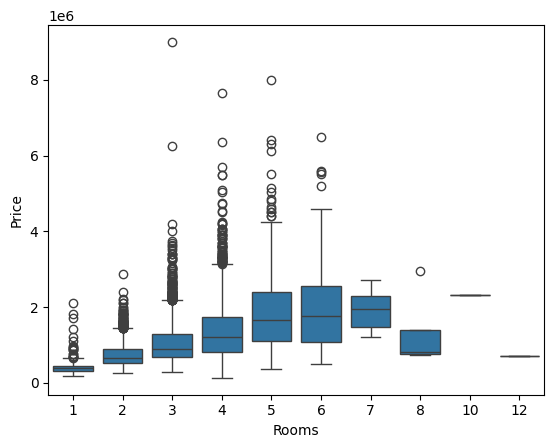

In [37]:
sns.boxplot(x="Rooms", y="Price", data=df)
plt.show()

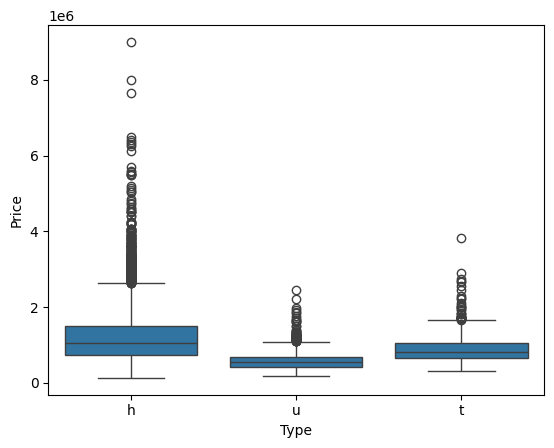

In [38]:
sns.boxplot(x="Type", y="Price", data=df)
plt.show()

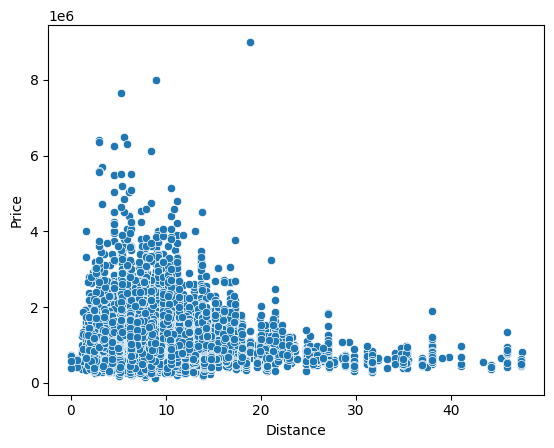

In [39]:
sns.scatterplot(x="Distance", y="Price", data=df)
plt.show()

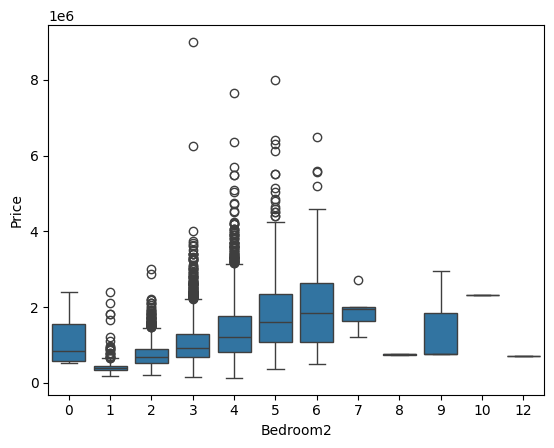

In [40]:
sns.boxplot(x="Bedroom2", y="Price", data=df)
plt.show()

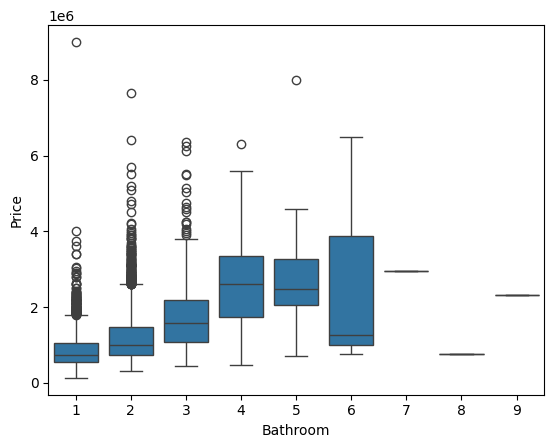

In [41]:
sns.boxplot(x="Bathroom", y="Price", data=df)
plt.show()

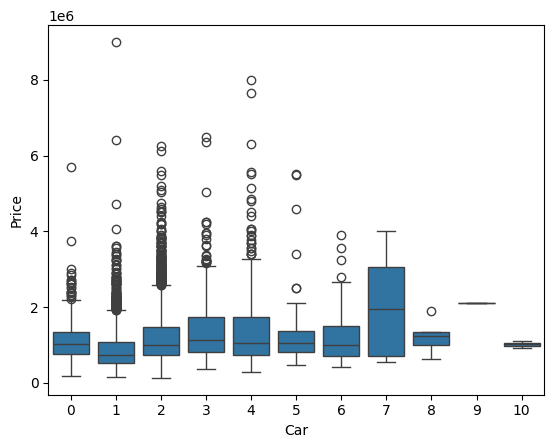

In [42]:
sns.boxplot(x="Car", y="Price", data=df)
plt.show()

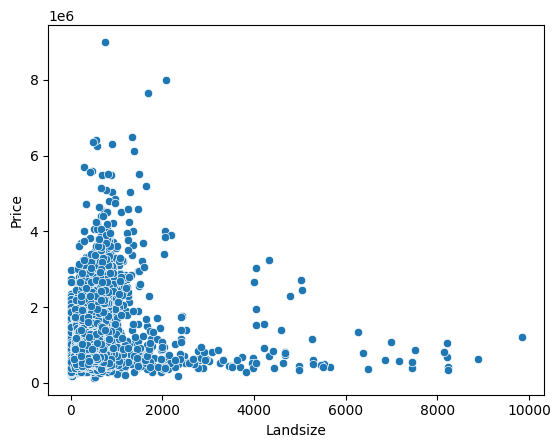

In [59]:
sns.scatterplot(x="Landsize", y="Price", data=df[df.Landsize < 10000])
plt.show()

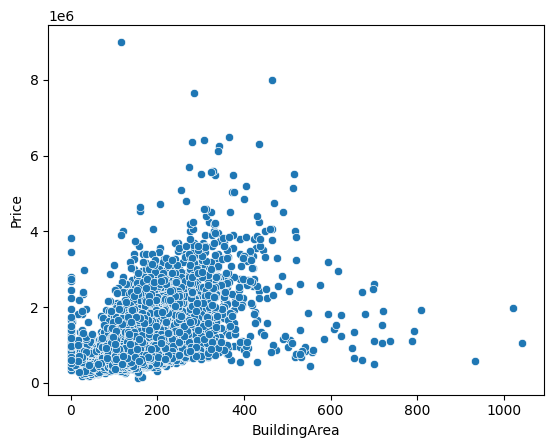

In [58]:
sns.scatterplot(x="BuildingArea", y="Price", data=df[df.BuildingArea < 1500])
plt.show()

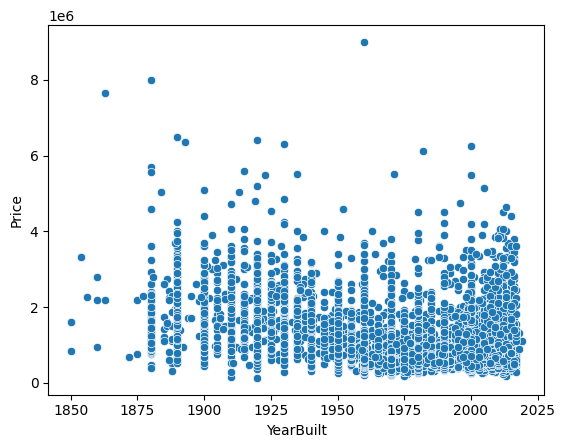

In [60]:
sns.scatterplot(x="YearBuilt", y="Price", data=df[df.YearBuilt > 1400])
plt.show()

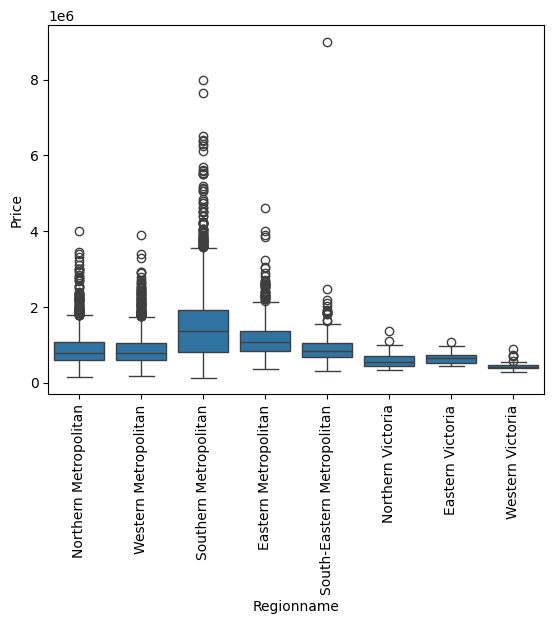

In [46]:
sns.boxplot(x="Regionname", y="Price", data=df)

plt.xticks(rotation=90)
plt.show()

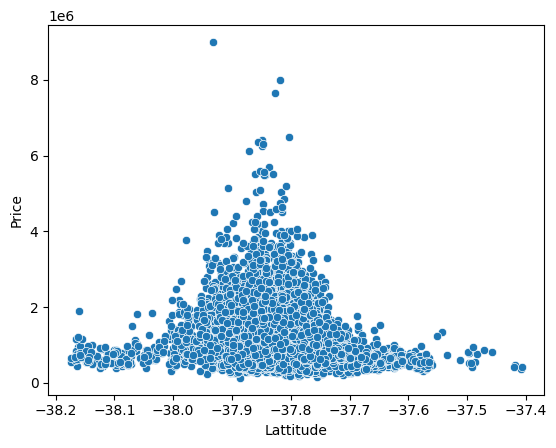

In [47]:
sns.scatterplot(x="Lattitude", y="Price", data=df)
plt.show()

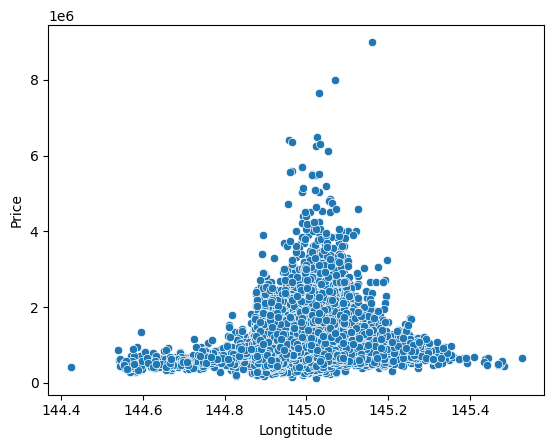

In [61]:
sns.scatterplot(x="Longtitude", y="Price", data=df)
plt.show()

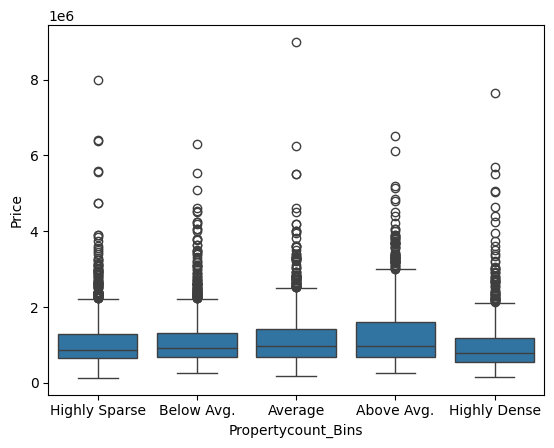

In [50]:
percentiles = [0, 20, 40, 60, 80, 100]
bin_edges = np.percentile(df['Propertycount'], percentiles)

bin_labels = ["Highly Sparse", "Below Avg.", "Average", "Above Avg.", "Highly Dense"]
df["Propertycount_Bins"] = pd.cut(df["Propertycount"], bins=bin_edges, labels=bin_labels, include_lowest=True)

sns.boxplot(x="Propertycount_Bins", y="Price", data=df)
plt.show()

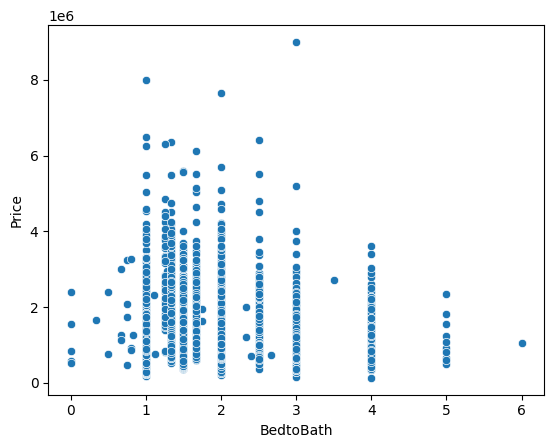

In [53]:
bath_zero = (df["Bathroom"] == 0)
df_new = df[~bath_zero]

df_new["BedtoBath"] = df_new["Bedroom2"] / df_new["Bathroom"]
sns.scatterplot(x="BedtoBath", y="Price", data=df_new)
plt.show()

/tmp/ipykernel_103980/315141946.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[~la_zero]


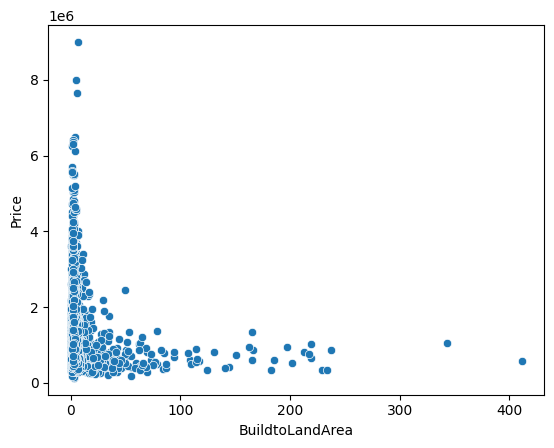

In [62]:
ba_zero = (df["BuildingArea"] == 0)
la_zero = (df["Landsize"] == 0)
df_new = df[~ba_zero]
df_new = df_new[~la_zero]

df_new["BuildtoLandArea"] = df_new["Landsize"] / df_new["BuildingArea"]
sns.scatterplot(x="BuildtoLandArea", y="Price", data=df_new[df_new.BuildtoLandArea < 600])
plt.show()

Variables - `Rooms`, `Type`, `Distance`, `Bedroom2`, `Bathroom`, `Landsize`, `BuildingArea`, `Latitude`, `Longitude`, `BedtoBath` and `BuildtoLandArea`
<br><br>
Ignored Variables - `Propertycount_Bins`, `Regionname`, `YearBuilt`, `Car`